In [1]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
# from meteostat import Point, Monthly, units, Daily, Stations, Normals
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
import scipy.stats as st
import time
import requests
from scipy.stats import linregress
from time import mktime
from pytz import utc, timezone
import webbrowser

In [2]:
file_path="output_data/temp_co2.csv"
df = pd.read_csv(file_path)

In [3]:
disasterdata_path="all_data_combined.csv"
disaster_df = pd.read_csv(disasterdata_path)

In [4]:
labels = ["Unnamed: 0"]
df.drop(columns = labels, inplace=True)
# disaster_df.drop(columns = labels, inplace=True)

In [5]:
disaster_df.head(1)

,Unnamed: 0,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),...,LandAndOceanAverageTemperatureUncertainty,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.15025,6.1475,0.259167,0.48,7.81,3.1275,196.724167,8.291667,15.3575,18.57


In [6]:
disaster_df.drop(['Earthquake (Occurrence)', 'Impact (Occurrence)', 'Landslide (Occurrence)',
                       'Mass movement (dry) (Occurrence)', 'Volcanic activity (Occurrence)',
                       'LandAndOceanAverageTemperatureUncertainty', 'SP500', 'Dividend', 'Earnings',
                      'Consumer Price Index', 'Long Interest Rate', 'LandAverageTemperature',
                      'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
                      'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
                       'Real Price', 'Real Dividend', 'PE10', 'Real Earnings'], axis = 1, inplace=True)

In [7]:
disaster_df.head(1)

,Unnamed: 0,All natural disasters (Occurrence),Drought (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Wildfire (Occurrence)
0,1900,5.0,2.0,0.0,1.0,1.0,0.0


In [8]:
# # RENAME COLUMNS
disaster_df.columns = ['Year', 'All Natural Disaster',
       'Drought', 'Extreme Temperature',
       'Extreme Weather', 'Flood',
       'Wildfire']

In [9]:
disaster_df.head()

,Year,All Natural Disaster,Drought,Extreme Temperature,Extreme Weather,Flood,Wildfire
0,1900,5.0,2.0,0.0,1.0,1.0,0.0
1,1901,2.0,0.0,0.0,0.0,0.0,0.0
2,1902,9.0,0.0,0.0,1.0,0.0,0.0
3,1903,8.0,1.0,0.0,2.0,2.0,0.0
4,1904,2.0,0.0,0.0,1.0,0.0,0.0


In [10]:
df.head(1)

,Year,CO2(ppm),Temp
0,1750,277.03,8.719364


In [11]:
# # MERGE Temp_CO2 & Disaster dataframes
df2 = pd.merge(df,disaster_df, how="left", on="Year")

In [12]:
df2.shape

(266, 9)

In [13]:
#Drop years without disaster data (NaN rows)
df2.dropna(axis = 0, how ='any', inplace=True)
df2.shape

(116, 9)

In [14]:
# # # REF--------REF--------REF--------REF--------REF--------REF--------
# # SEABORN plotting method
# sns.scatterplot(x="Year",y="All Natural Disaster",data=df2);

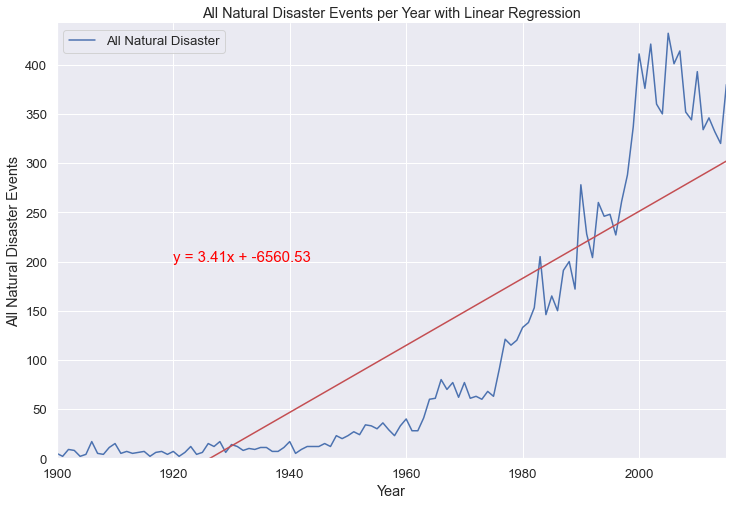

In [15]:
dist_col_indx = 3

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+10)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,200),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

In [16]:
# # DATAFRAME TO SUMMARIZE OF STATISTICAL DATA
df2_summary ={}
df2_summary = pd.DataFrame(df2_summary)
corr_coef_calc = ""

In [17]:
df2_summary["Name"] = ""
df2_summary["Slope"] = ""
df2_summary["Intercept"] = ""
df2_summary["Correlation Coefficient | r-value"] = ""
df2_summary["p-value"] = ""
df2_summary["Standard Deviation"] = ""

In [18]:
df2_summary.loc[len(df2_summary.index)] =[y_name, slope, intercept, rvalue, pvalue, stderr]

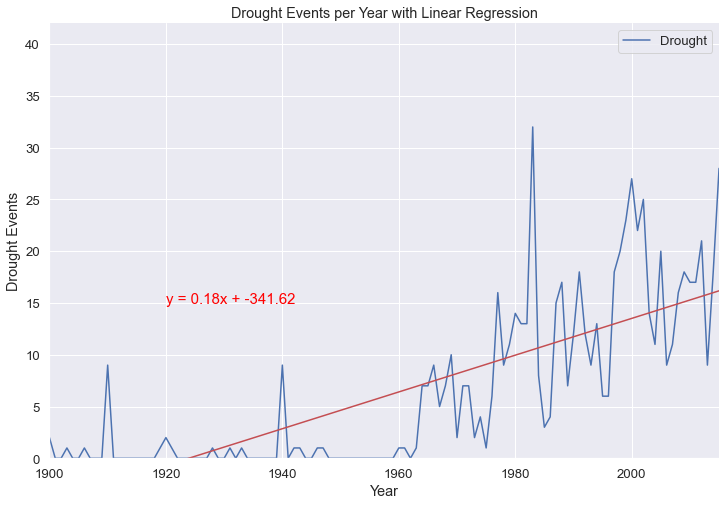

In [19]:
dist_col_indx = 4

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+10)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,15),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

In [20]:
df2_summary.loc[len(df2_summary.index)] =[y_name, slope, intercept, rvalue, pvalue, stderr]

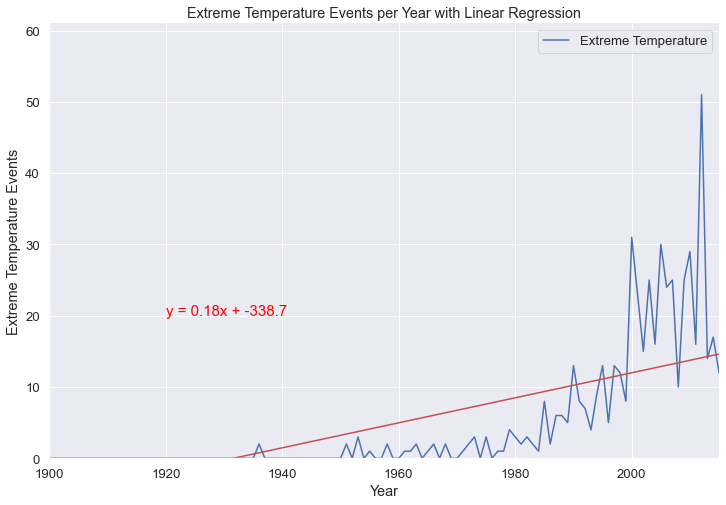

In [21]:
dist_col_indx = 5

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+10)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,20),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

In [22]:
df2_summary.loc[len(df2_summary.index)] =[y_name, slope, intercept, rvalue, pvalue, stderr]

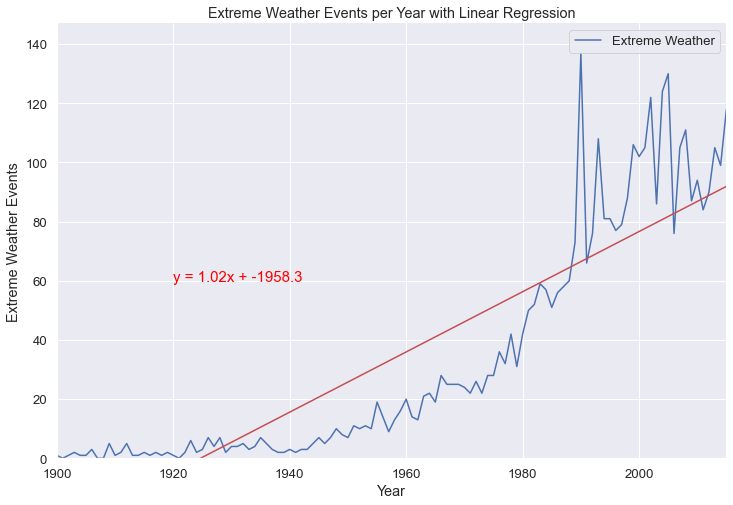

In [23]:
dist_col_indx = 6

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+10)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,60),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

In [24]:
df2_summary.loc[len(df2_summary.index)] =[y_name, slope, intercept, rvalue, pvalue, stderr]

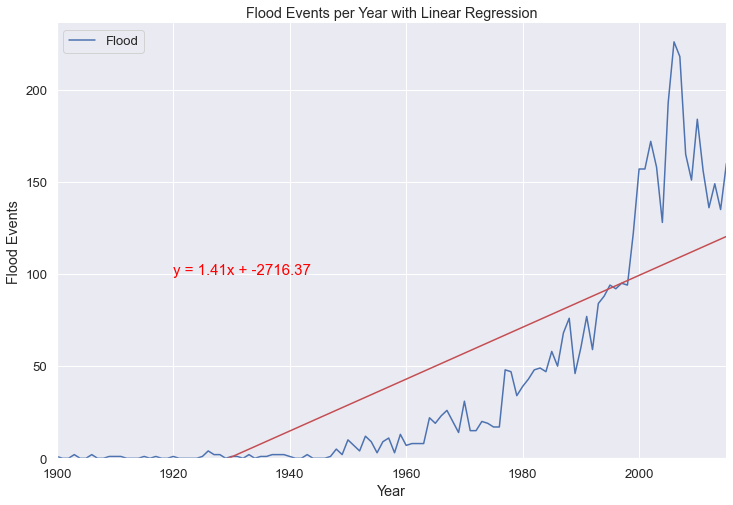

In [25]:
dist_col_indx = 7

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+10)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,100),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

In [26]:
df2_summary.loc[len(df2_summary.index)] =[y_name, slope, intercept, rvalue, pvalue, stderr]

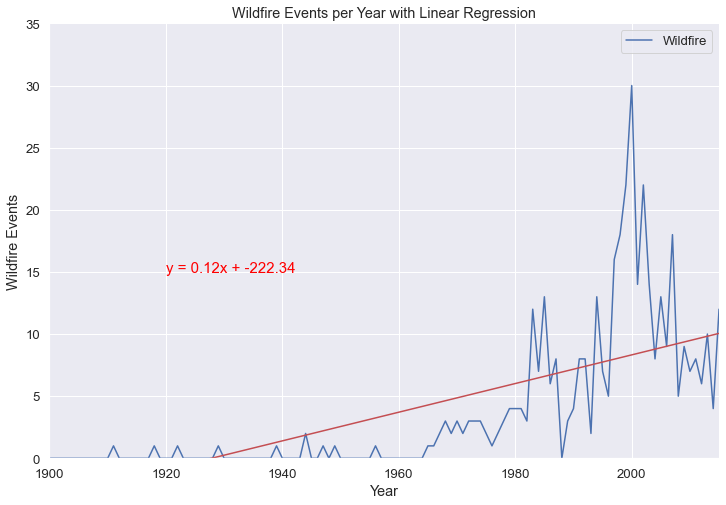

In [27]:
dist_col_indx = 8

x_axis = df2.iloc[:,0]
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = df2.iloc[:,0] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

df2.plot.line(x="Year", y=df2.columns[dist_col_indx])

# Sets the x limits of the current chart
plt.xlim(min(x_axis), max(x_axis)+0)
              
# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+5)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1920,15),fontsize=15,color="red")

# Give our chart some labels and a tile
plt.title(f"{y_name} Events per Year with Linear Regression")
plt.xlabel("Year")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

In [28]:
df2_summary.loc[len(df2_summary.index)] =[y_name, slope, intercept, rvalue, pvalue, stderr]

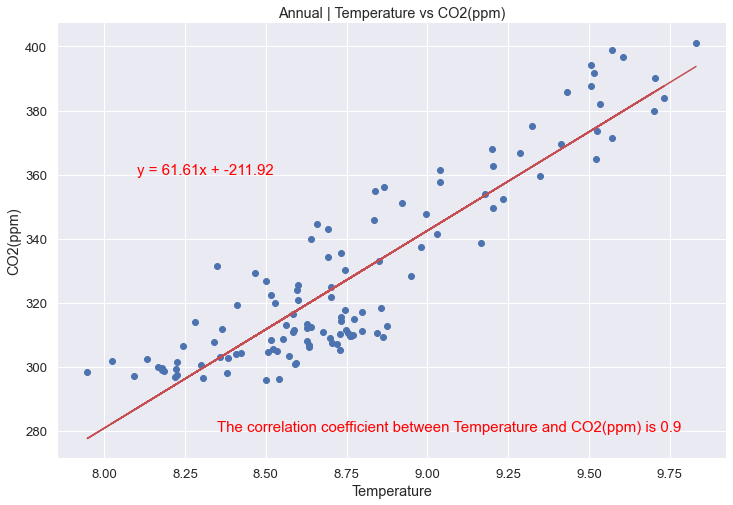

In [29]:
temp = df2.iloc[:,2]
co2 = df2.iloc[:,1]

y_name=f'{df2.columns[2]} vs. {df2.columns[1]}'

plt.scatter(temp, co2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(temp, co2)
regress_values = temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# corr_coef_calc = st.pearsonr(temp,co2)[0]
corr_coef = f"The correlation coefficient between Temperature and CO2(ppm) is {round(rvalue,2)}"

plt.plot(temp, regress_values,"r-")
plt.annotate(line_eq,(8.1,360),fontsize=15,color="red")
plt.annotate(corr_coef,(8.35,280),fontsize=15,color="red")

plt.title("Annual | Temperature vs CO2(ppm)")
plt.xlabel('Temperature')
plt.ylabel('CO2(ppm)')
plt.savefig(f'../png_data/Temp_CO2_HYC.png')
plt.show()

In [30]:
df2_summary.loc[len(df2_summary.index)] =[y_name, slope, intercept, rvalue, pvalue, stderr]

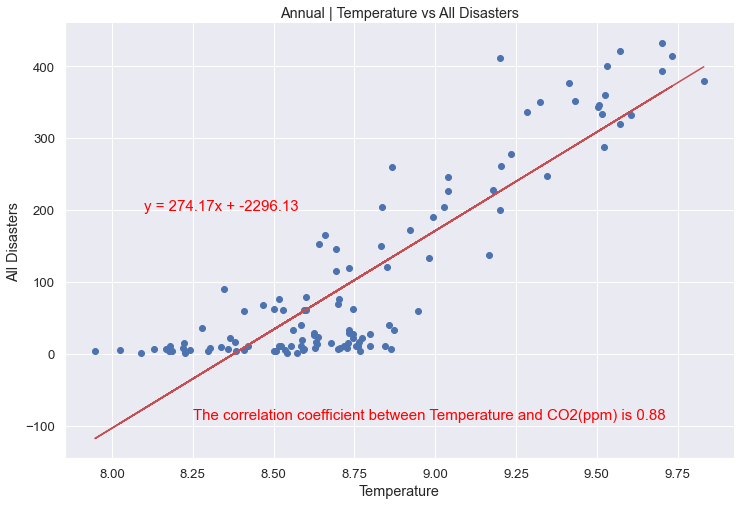

In [31]:
temp = df2.iloc[:,2]
disasters_all = df2.iloc[:,3]

y_name=f'{df2.columns[2]} vs. {df2.columns[3]}'

plt.scatter(temp, disasters_all)

(slope, intercept, rvalue, pvalue, stderr) = linregress(temp, disasters_all)
regress_values = temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

corr_coef = f"The correlation coefficient between Temperature and CO2(ppm) is {round(rvalue,2)}"

plt.plot(temp, regress_values,"r-")
plt.annotate(line_eq,(8.1,200),fontsize=15,color="red")
plt.annotate(corr_coef,(8.25,-90),fontsize=15,color="red")

plt.title("Annual | Temperature vs All Disasters")
plt.xlabel('Temperature')
plt.ylabel('All Disasters')
plt.savefig(f'../png_data/Temp_disastersALL_HYC.png')
plt.show()

In [32]:
df2_summary.loc[len(df2_summary.index)] =[y_name, slope, intercept, rvalue, pvalue, stderr]

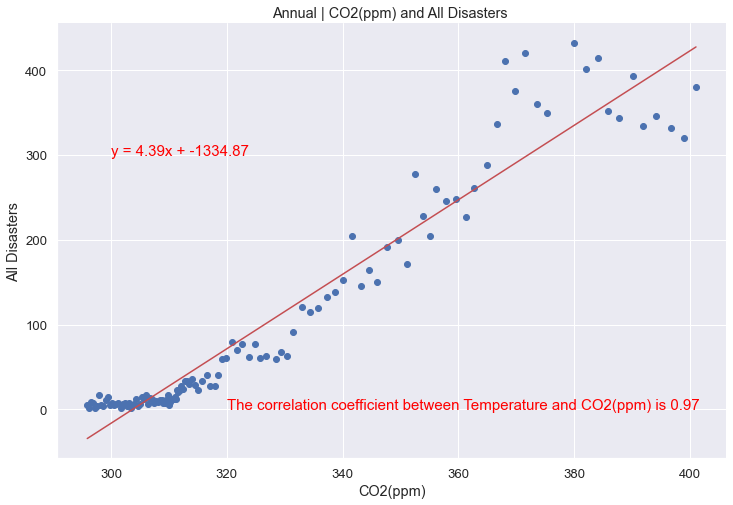

In [39]:
co2 = df2.iloc[:,1]
disasters_all = df2.iloc[:,3]

y_name=f'{df2.columns[1]} vs. {df2.columns[3]}'

plt.scatter(co2, disasters_all)

(slope, intercept, rvalue, pvalue, stderr) = linregress(co2, disasters_all)
regress_values = co2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

corr_coef = f"The correlation coefficient between Temperature and CO2(ppm) is {round(rvalue,2)}"

plt.plot(co2, regress_values,"r-")
plt.annotate(line_eq,(300,300),fontsize=15,color="red")
plt.annotate(corr_coef,(320,0),fontsize=15,color="red")

plt.title("Annual | CO2(ppm) and All Disasters ")
plt.xlabel('CO2(ppm)')
plt.ylabel('All Disasters')
plt.savefig(f'../png_data/co2_disastersALL_HYC.png')
plt.show()

In [40]:
from scipy import stats
pts = len(df2)
a = co2
b = disasters_all

x = np.concatenate((a, b))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
    
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


In [35]:
# #  FORMATTING DATAFRAME
# df2_summary_formatted = pd.DataFrame(df2_summary)
# df2_summary_formatted

In [37]:
df2_summary.to_csv(r"output_data/temp_co2_disaster_stat_summary.csv")

In [38]:
df2_summary

,Name,Slope,Intercept,Correlation Coefficient | r-value,p-value,Standard Deviation
0,All Natural Disaster,3.405778,-6560.525718,0.865790,4.536903e-36,0.184363
1,Drought,0.177565,-341.618095,0.767164,1.004027e-23,0.013905
2,Extreme Temperature,0.175347,-338.698535,0.682915,3.065679e-17,0.017567
3,Extreme Weather,1.017476,-1958.295237,0.878821,1.969117e-38,0.051740
4,Flood,1.407827,-2716.372794,0.816155,6.374026e-29,0.093353
5,Wildfire,0.115331,-222.337620,0.689188,1.202780e-17,0.011356
6,Temp vs. CO2(ppm),61.607303,-211.922542,0.899633,7.807336e-43,2.800563
7,Temp vs. All Natural Disaster,274.171616,-2296.131694,0.879185,1.676566e-38,13.916625
